In [100]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import numpy as np 
import joblib
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [101]:
df_train = pd.read_csv('../Testing Dataset/Original/KDDTrain+aggregateOneCls.csv',sep=',')
df_train_encode = pd.read_csv('../Testing Dataset/Numeric/KDDTrain+aggregateOneClsNumeric.csv',sep=',')
df_test = pd.read_csv('../Testing Dataset/Original/KDDTest+aggregateOneCls.csv',sep=',')
df_test_encode = pd.read_csv('../Testing Dataset/Numeric/KDDTest+aggregateOneClsNumeric.csv',sep=',')

In [102]:
df_train.columns[41]

' classification.'

In [103]:
df_train[' protocol_type'] = df_train[' protocol_type'].replace('icmp', 1)
df_train[' protocol_type'] = df_train[' protocol_type'].replace('tcp', 2)
df_train[' protocol_type'] = df_train[' protocol_type'].replace('udp', 3)


df_test[' protocol_type'] = df_test[' protocol_type'].replace('icmp', 1)
df_test[' protocol_type'] = df_test[' protocol_type'].replace('tcp', 2)
df_test[' protocol_type'] = df_test[' protocol_type'].replace('udp', 3)
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classification.
0,0,2,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,3,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,2,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Anormal
3,0,2,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,2,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [108]:
df_train_encode[' protocol_type'] = df_train[' protocol_type']
df_test_encode[' protocol_type'] = df_test[' protocol_type']
df_train_encode

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type
0,-0.110249,-0.007679,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,1,0,2
1,-0.110249,-0.007737,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,1,0,3
2,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,0,0,0,0,2
3,-0.110249,-0.007723,-0.002891,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,0,0,0,0,1,0,2
4,-0.110249,-0.007728,-0.004814,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,0,0,0,0,2
125969,-0.107178,-0.007744,-0.004883,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,1,0,3
125970,-0.110249,-0.007382,-0.004823,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,0,0,0,0,1,0,2
125971,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,0,0,0,0,2


In [115]:
df_train_encode[' classification.'] = df_train[' classification.']
df_train_encode[' classification.'] = df_train_encode[' classification.'].replace('normal',0)
df_train_encode[' classification.'] = df_train_encode[' classification.'].replace('Anormal',1)
df_train_encode

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type
0,-0.110249,-0.007679,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,1,0,2
1,-0.110249,-0.007737,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,1,0,3
2,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,0,0,0,0,2
3,-0.110249,-0.007723,-0.002891,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,0,0,0,0,1,0,2
4,-0.110249,-0.007728,-0.004814,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,0,0,0,0,2
125969,-0.107178,-0.007744,-0.004883,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,0,0,1,0,3
125970,-0.110249,-0.007382,-0.004823,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,0,0,0,0,1,0,2
125971,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,0,0,0,0,2


In [117]:
df_train_y = df_train_encode[' classification.']
df_train_x = df_train_encode.drop(' classification.', 1)
df_train_y.head(5)

0    0
1    0
2    1
3    0
4    0
Name:  classification., dtype: int64

In [133]:
#Splitting Data 

x_train,x_test,y_train,y_test = train_test_split(df_train_x,df_train_y,test_size=0.30,random_state=9)

x_train_awal = x_train
x_test_awal = x_test
y_train_awal = y_train
y_test_awal = y_test


x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_train.shape


(88181, 123, 1)

In [119]:
model_full = Sequential()
model_full.add(LSTM(100, input_shape=(x_train.shape[1],1), return_sequences=True))
model_full.add(Dropout(0.5))
model_full.add(LSTM(32, return_sequences=False))
model_full.add(Dense(10, activation='relu'))
model_full.add(Dense(3, activation='softmax'))

model_full.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=['accuracy','MeanSquaredError', 'MeanAbsoluteError'])
model_full.fit(x_train, y_train, epochs=10)


Epoch 1/10
2756/2756 [==============================] - 727s 262ms/step - loss: 0.5347 - accuracy: 0.6767 - mean_squared_error: 0.3662 - mean_absolute_error: 0.4891
Epoch 2/10
2756/2756 [==============================] - 707s 257ms/step - loss: 0.1582 - accuracy: 0.9478 - mean_squared_error: 0.4608 - mean_absolute_error: 0.4889
Epoch 3/10
2756/2756 [==============================] - 877s 318ms/step - loss: 0.1245 - accuracy: 0.9586 - mean_squared_error: 0.4663 - mean_absolute_error: 0.4881
Epoch 4/10
2756/2756 [==============================] - 401s 145ms/step - loss: 0.0950 - accuracy: 0.9682 - mean_squared_error: 0.4718 - mean_absolute_error: 0.4884
Epoch 5/10
2756/2756 [==============================] - 736s 267ms/step - loss: 0.0861 - accuracy: 0.9705 - mean_squared_error: 0.4729 - mean_absolute_error: 0.4881
Epoch 6/10
2756/2756 [==============================] - 762s 276ms/step - loss: 0.0732 - accuracy: 0.9757 - mean_squared_error: 0.4761 - mean_absolute_error: 0.4886
Epoch 7/10

In [120]:
model_full.save('NSL_Model.h5')

In [122]:
y_pred_train = model_full.predict(x_train)
y_pred_train

array([[9.8709434e-01, 1.2905649e-02, 8.8384645e-18],
       [9.9671906e-01, 3.2809256e-03, 1.0675367e-18],
       [9.9378347e-01, 6.2164711e-03, 7.9506807e-17],
       ...,
       [1.6977784e-04, 9.9983025e-01, 3.4832566e-17],
       [9.9697006e-01, 3.0298824e-03, 5.7346824e-19],
       [9.9583083e-01, 4.1691572e-03, 8.0590329e-18]], dtype=float32)

In [134]:
y_pred_train_1 = [x[0] for x in y_pred_train]
y_pred_train_2 = [x[1] for x in y_pred_train]
y_pred_train_3 = [x[2] for x in y_pred_train]

In [135]:
df_train_akhir = x_train_awal
df_train_akhir['lstm_result_1'] = y_pred_train_1
df_train_akhir['lstm_result_2'] = y_pred_train_2
df_train_akhir['lstm_result_3'] = y_pred_train_3
df_train_akhir['label'] = y_train
df_train_akhir

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type,lstm_result_1,lstm_result_2,lstm_result_3,label
555,-0.110249,-0.007674,-0.004918,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,3,0.987094,0.012906,8.838465e-18,0
120025,-0.110249,-0.007703,-0.004533,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.996719,0.003281,1.067537e-18,0
98037,-0.110249,-0.007730,-0.004840,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.993783,0.006216,7.950681e-17,0
117175,-0.110249,-0.007704,-0.004539,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.996960,0.003040,5.871292e-19,0
22744,-0.110249,-0.007717,-0.003610,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.996813,0.003187,8.507532e-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65462,-0.110249,-0.007759,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.987428,0.012572,2.905655e-16,0
66037,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,2,0.000160,0.999840,2.612351e-17,1
55934,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,2,0.000170,0.999830,3.483257e-17,1
86364,-0.110249,-0.007728,-0.004485,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.996970,0.003030,5.734682e-19,0


In [139]:
y_test_pred = model_full.predict(x_test)
y_test_pred_1 = [x[0] for x in y_test_pred]
y_test_pred_2 = [x[1] for x in y_test_pred]
y_test_pred_3 = [x[2] for x in y_test_pred]

y_test_pred

array([[1.5880368e-03, 9.9841189e-01, 1.6565281e-15],
       [9.9731618e-01, 2.6837753e-03, 3.8008455e-20],
       [2.3145516e-01, 7.6854479e-01, 5.0159654e-09],
       ...,
       [1.5188147e-04, 9.9984813e-01, 6.1370846e-17],
       [9.9735755e-01, 2.6424394e-03, 2.0297329e-19],
       [9.9774230e-01, 2.2576763e-03, 4.2210090e-20]], dtype=float32)

In [140]:
df_x_test = x_test_awal
df_x_test['lstm_result_1'] = y_test_pred_1
df_x_test['lstm_result_2'] = y_test_pred_2
df_x_test['lstm_result_3'] = y_test_pred_3
df_x_test['label'] = y_test
df_x_test

c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type,lstm_result_1,lstm_result_2,lstm_result_3,label
109434,-0.110249,-0.007757,-0.004919,0,11.743480,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,3,0.001588,0.998412,1.656528e-15,1
125081,-0.110249,-0.007621,-0.004836,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.997316,0.002684,3.800845e-20,0
73314,-0.110249,-0.007704,-0.004849,0,-0.089486,-0.007736,0.370049,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.231455,0.768545,5.015965e-09,0
82592,-0.110249,-0.007699,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,2,0.997285,0.002715,2.465618e-19,0
49069,-0.110249,-0.007761,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,1,0.001563,0.998437,9.880572e-13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10642,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,2,0.000392,0.999608,5.221910e-16,1
123179,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,2,0.000284,0.999716,1.286965e-15,1
112760,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,2,0.000152,0.999848,6.137085e-17,1
89546,-0.110249,-0.007705,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.997358,0.002642,2.029733e-19,1


In [142]:
df_train_akhir.to_csv('data_latih_nsl.csv', sep=',', index=False)
df_x_test.to_csv('data_test_nsl.csv',sep=',', index=False)

# Naive Bayes

In [148]:
nb_classifier = GaussianNB()
nb_classifier


GaussianNB()

In [149]:
df_train = pd.read_csv('data_latih_nsl.csv', sep=',')
df_test = pd.read_csv('data_test_nsl.csv', sep=',')
df_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_loginsì,logged_in,num_compromised,...,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type,lstm_result_1,lstm_result_2,lstm_result_3,label
0,-0.110249,-0.007674,-0.004918,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,1,0,3,0.987094,0.012906,8.838465e-18,0
1,-0.110249,-0.007703,-0.004533,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.996719,0.003281,1.067537e-18,0
2,-0.110249,-0.007730,-0.004840,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.993783,0.006216,7.950681e-17,0
3,-0.110249,-0.007704,-0.004539,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.996960,0.003040,5.871292e-19,0
4,-0.110249,-0.007717,-0.003610,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.996813,0.003187,8.507532e-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88176,-0.110249,-0.007759,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.987428,0.012572,2.905655e-16,0
88177,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,2,0.000160,0.999840,2.612351e-17,1
88178,-0.110249,-0.007762,-0.004919,0,-0.089486,-0.007736,-0.095076,-0.027023,0,-0.011664,...,0,0,0,0,0,2,0.000170,0.999830,3.483257e-17,1
88179,-0.110249,-0.007728,-0.004485,0,-0.089486,-0.007736,-0.095076,-0.027023,1,-0.011664,...,0,0,0,1,0,2,0.996970,0.003030,5.734682e-19,0


In [155]:
df_train = df_train[[' protocol_type','lstm_result_1','lstm_result_2','lstm_result_3','label']]
df_test = df_test[[' protocol_type','lstm_result_1','lstm_result_2','lstm_result_3','label']]
df_train

,protocol_type,lstm_result_1,lstm_result_2,lstm_result_3,label
0,3,0.987094,0.012906,8.838465e-18,0
1,2,0.996719,0.003281,1.067537e-18,0
2,2,0.993783,0.006216,7.950681e-17,0
3,2,0.996960,0.003040,5.871292e-19,0
4,2,0.996813,0.003187,8.507532e-19,0
...,...,...,...,...,...
88176,2,0.987428,0.012572,2.905655e-16,0
88177,2,0.000160,0.999840,2.612351e-17,1
88178,2,0.000170,0.999830,3.483257e-17,1
88179,2,0.996970,0.003030,5.734682e-19,0


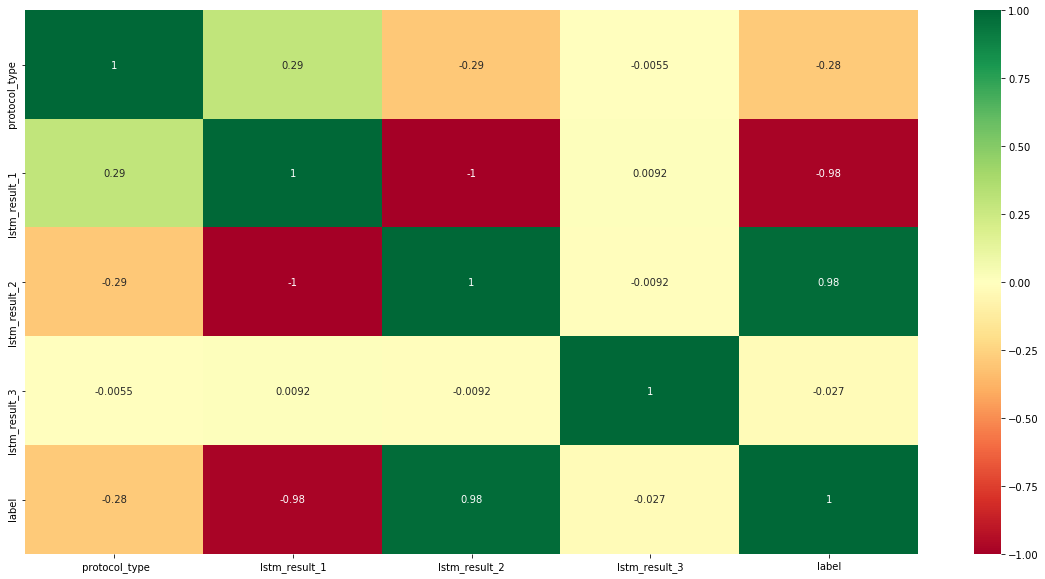

In [156]:
#Heatmap

fig = plt.figure(figsize=(20,10))
corrMatrix = df_train.corr()
sn.heatmap(corrMatrix,annot=True,cmap ='RdYlGn')
plt.show()

In [159]:
x_train = df_train[[' protocol_type', 'lstm_result_1','lstm_result_2','lstm_result_3']]
y_train = df_train['label']

x_test = df_test[[' protocol_type', 'lstm_result_1','lstm_result_2','lstm_result_3']]
y_test = df_test['label']

In [160]:
import joblib
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [161]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}

NB_Feature_Grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring='accuracy' ,verbose=1, cv=10, n_jobs=1)
NB_Feature_Grid.fit(x_train, y_train)
print(NB_Feature_Grid.best_estimator_)


Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GaussianNB(var_smoothing=0.07175560918936924)


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  4.5min finished


In [162]:
print(NB_Feature_Grid.best_score_)

0.988580301644131


In [163]:
best_estimator = NB_Feature_Grid.best_estimator_
best_estimator

GaussianNB(var_smoothing=0.07175560918936924)

In [164]:
#Save Best Estimator 
joblib.dump(best_estimator, 'naive_bayes_nsl_final.pkl')

['naive_bayes_nsl_final.pkl']

In [165]:
best_nb = best_estimator
train_pred = best_nb.predict(x_train)
test_pred = best_nb.predict(x_test)

In [166]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.30,random_state=9)

In [167]:
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [168]:
train_pred = nb_classifier.predict(x_train)
val_pred = nb_classifier.predict(x_val)
test_pred = nb_classifier.predict(x_test)

In [170]:
def calculate_precision(TP, FP):
    return TP/(TP+FP)


def calculate_fnr(TP, FP, FN):
    return FN/(TP+FP)

In [171]:
cm = confusion_matrix(y_train, train_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_train, train_pred))
print("Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[28287   426]
 [  278 32735]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     33013
           1       0.99      0.99      0.99     28713

    accuracy                           0.99     61726
   macro avg       0.99      0.99      0.99     61726
weighted avg       0.99      0.99      0.99     61726

Accuracy: 98.859475747659
Precision 99.0267810257308
False Negative Rate 1.4913355504988621


In [172]:
cm = confusion_matrix(y_val, val_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_val, val_pred))
print("Accuracy:",accuracy_score(y_val, val_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[12042   209]
 [  106 14098]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14204
           1       0.99      0.98      0.99     12251

    accuracy                           0.99     26455
   macro avg       0.99      0.99      0.99     26455
weighted avg       0.99      0.99      0.99     26455

Accuracy: 98.80929880929881
Precision 99.12742838327297
False Negative Rate 1.7204478103391505


In [173]:
cm = confusion_matrix(y_test, test_pred, labels=[1,0])
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]

print(cm)
print(classification_report(y_test, test_pred))
print("Accuracy:",accuracy_score(y_test, test_pred)*100)
print("Precision",(calculate_precision(TP,FP))*100)
print("False Negative Rate", (calculate_fnr(TP,FP,FN))*100)

[[17388   278]
 [  162 19964]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20126
           1       0.99      0.98      0.99     17666

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792

Accuracy: 98.83573243014393
Precision 99.07692307692308
False Negative Rate 1.584045584045584
